In [2]:

import numpy as np
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
pip install astral

Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
from astral import LocationInfo, sun

In [6]:
df = pd.read_csv("IndianWeatherRepository.csv")

In [7]:
df.head()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113918 entries, 0 to 113917
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   country                       113918 non-null  object 
 1   location_name                 113918 non-null  object 
 2   region                        113918 non-null  object 
 3   latitude                      113918 non-null  float64
 4   longitude                     113918 non-null  float64
 5   timezone                      113918 non-null  object 
 6   last_updated_epoch            113918 non-null  int64  
 7   last_updated                  113918 non-null  object 
 8   temperature_celsius           113918 non-null  float64
 9   temperature_fahrenheit        113918 non-null  float64
 10  condition_text                113918 non-null  object 
 11  wind_mph                      113918 non-null  float64
 12  wind_kph                      113918 non-nul

In [9]:
df.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,113918.000000,113918.000000,1.139180e+05,113918.000000,113918.000000,113918.000000,113918.000000,113918.000000,113918.000000,113918.000000,...,113918.000000,113918.000000,113918.000000,113918.000000,113918.000000,113918.000000,113918.000000,113918.000000,113918.000000,113918.000000
mean,23.099316,80.246004,1.702472e+09,19.924824,67.864838,4.929536,7.938013,155.350164,1013.026747,29.914195,...,15.545768,785.805153,42.486398,14.729425,6.588003,94.735017,112.055903,3.308801,6.746063,52.076204
std,5.790795,5.762795,5.350192e+06,6.312880,11.363009,2.746952,4.412776,115.549882,4.880331,0.143966,...,7.800716,663.695023,30.062343,15.780859,13.369330,97.569477,110.195685,1.415501,3.476380,35.223527
min,7.170000,68.970000,1.693286e+09,-30.700000,-23.300000,2.200000,3.600000,1.000000,991.000000,29.280000,...,0.000000,113.500000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,0.000000
25%,20.270000,76.070000,1.697748e+09,16.300000,61.400000,2.700000,4.300000,53.000000,1011.000000,29.850000,...,9.800000,420.600000,18.800000,5.300000,1.600000,31.700000,42.100000,2.000000,3.000000,17.000000
50%,23.950000,78.690000,1.702668e+09,21.000000,69.800000,4.300000,6.800000,120.000000,1014.000000,29.930000,...,14.400000,587.500000,37.900000,10.200000,3.400000,63.100000,78.200000,3.000000,8.000000,53.000000
75%,26.770000,83.900000,1.707068e+09,24.400000,76.000000,6.300000,10.100000,271.000000,1016.000000,30.010000,...,20.400000,934.600000,61.500000,19.200000,6.900000,121.600000,142.700000,4.000000,10.000000,88.000000
max,34.570000,95.800000,1.711556e+09,38.300000,100.900000,26.800000,43.200000,360.000000,1073.000000,31.690000,...,82.200000,13565.100000,243.200000,318.100000,557.000000,1374.800000,1537.800000,6.000000,10.000000,100.000000


In [10]:
df.isnull().sum()

country                         0
location_name                   0
region                          0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Oz

In [11]:
df.shape

(113918, 42)

In [12]:
df.columns

Index(['country', 'location_name', 'region', 'latitude', 'longitude',
       'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [13]:
df = df.sort_values(by='temperature_celsius', ascending=False)
highest_temp_row = df.iloc[0]
location_name = highest_temp_row['location_name']
region = highest_temp_row['region']
timezone = highest_temp_row['timezone']
temp_celsius = highest_temp_row['temperature_celsius']
print(f"The city with the highest temperature in celsius is {location_name}, {region} ({timezone}) with a temperature of {temp_celsius}°C. ")

The city with the highest temperature in celsius is Bikaner, Rajasthan (Asia/Kolkata) with a temperature of 38.3°C. 


In [14]:
location = df['location_name'].head(5)
temps_celsius = df['temperature_celsius'].head(5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


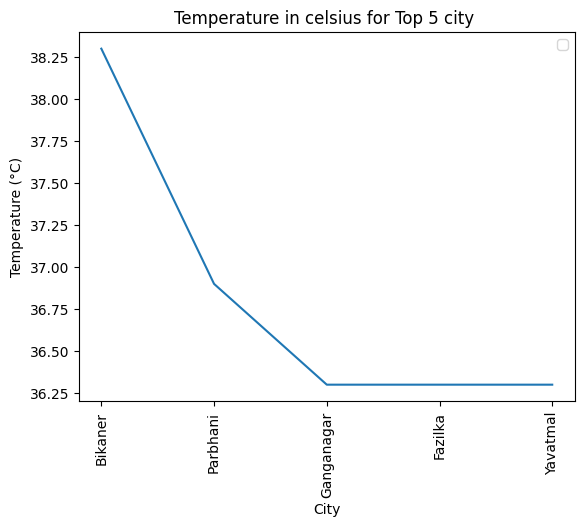

In [15]:
plt.plot(location,temps_celsius)
plt.title('Temperature in celsius for Top 5 city ')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [16]:
location_low = df['location_name'].tail()
temps_celsius_low = df['temperature_celsius'].tail()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


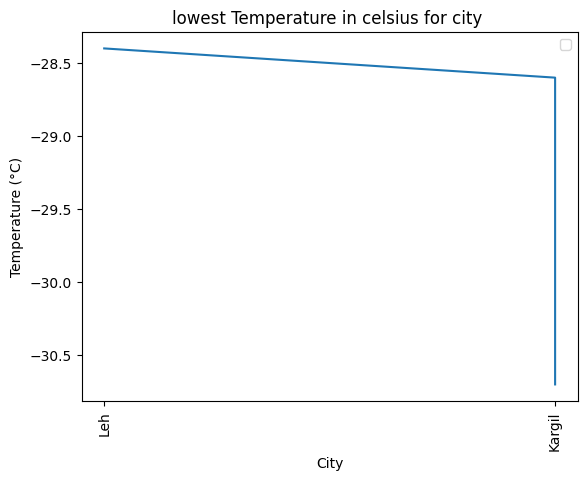

In [17]:
plt.plot(location_low,temps_celsius_low)
plt.title('lowest Temperature in celsius for city ')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [18]:
df['temp_diff'] = df['temperature_celsius']-df['feels_like_celsius']

In [19]:
high_diff_row = df.loc[df['temp_diff'].idxmax()]

location_name = high_diff_row['location_name']
region = high_diff_row['region']
timezone = high_diff_row['timezone']
time = high_diff_row['last_updated']

In [20]:
print(f"The city with highest difference between temperature and feels like temperature in Celsius is {location_name},{region}({timezone})with a difference of {high_diff_row['temp_diff']}°C. The  time there was {time}.")

The city with highest difference between temperature and feels like temperature in Celsius is Kargil,Jammu and Kashmir(Asia/Kolkata)with a difference of 9.3°C. The  time there was 2024-03-03 22:45.


In [21]:
average = df['temperature_celsius'].mean()
print(f'The average temperature in celsius across all location is {average:.2f} degree.')

The average temperature in celsius across all location is 19.92 degree.


In [22]:
corr = df['temperature_celsius'].corr(df['humidity'])
print(f'The correlation between temperature (Celsius) and humidity is {corr:.2f}')

The correlation between temperature (Celsius) and humidity is 0.11


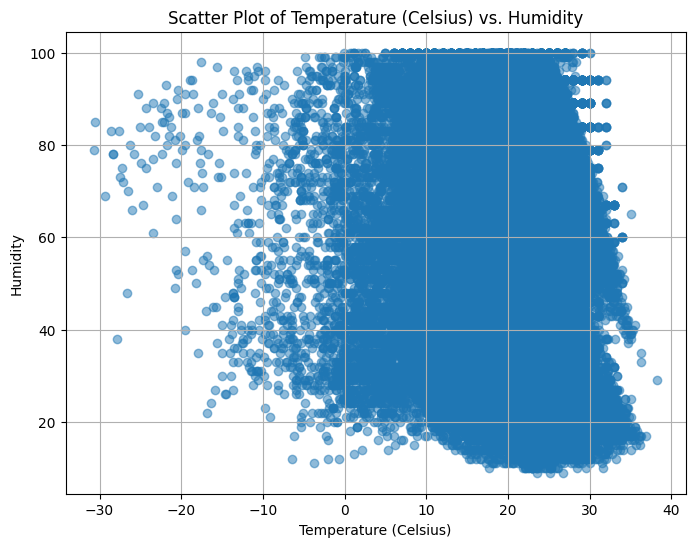

In [23]:
x = df['temperature_celsius']
y = df['humidity']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.title("Scatter Plot of Temperature (Celsius) vs. Humidity")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Humidity")
plt.grid(True)
plt.show()

In [24]:
average_pm2_5 = df['air_quality_PM2.5'].mean()
average_pm_10 = df['air_quality_PM10'].mean()

In [25]:
print(f'The average air quality PM2.5 across all location is {average_pm2_5:.2f}')
print(f'The average air quality PM10 across all location is {average_pm_10:.2f}')

The average air quality PM2.5 across all location is 94.74
The average air quality PM10 across all location is 112.06


In [26]:
df['air_quality_Carbon_Monoxide'].mean()


785.8051528292282

In [27]:
threshold = 671.290
high = df[df['air_quality_Carbon_Monoxide']> threshold]
if not high.empty:
    print("Location with 'air_quality_Carbon_monoxide'above the threshold: ")
    print(high[['location_name','air_quality_Carbon_Monoxide']])
else:
    print("No Location Have 'air_quality_Carbon_Monoxide' above  the threshold ")


Location with 'air_quality_Carbon_monoxide'above the threshold: 
       location_name  air_quality_Carbon_Monoxide
9142      Ganganagar                        761.0
9063         Fazilka                        734.3
9139     Hanumangarh                        761.0
113722        Nanded                        734.3
113170        Nanded                        867.8
...              ...                          ...
86072        Kupwara                        807.8
83396     Sheikhpura                        701.0
86702     Sheikhpura                        754.4
87255     Sheikhpura                        814.4
86146     Sheikhpura                        721.0

[47417 rows x 2 columns]


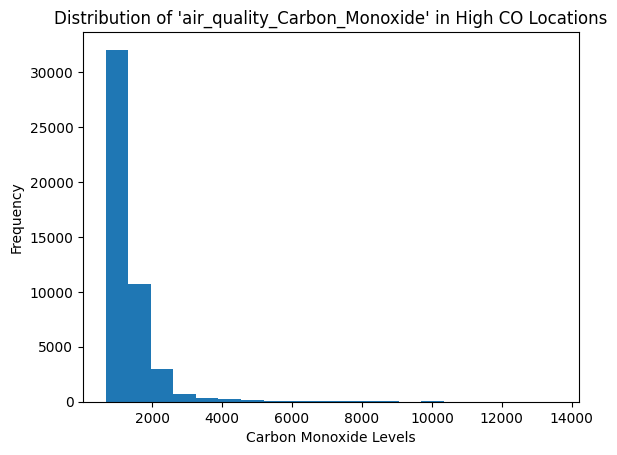

In [28]:
high = df[df['air_quality_Carbon_Monoxide'] > threshold]

plt.hist(high['air_quality_Carbon_Monoxide'], bins=20)
plt.title("Distribution of 'air_quality_Carbon_Monoxide' in High CO Locations")
plt.xlabel("Carbon Monoxide Levels")
plt.ylabel("Frequency")
plt.show()


In [31]:
import folium


In [30]:
pip install folium

   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   --------------- ----------------------- 41.0/100.0 kB 653.6 kB/s eta 0:00:01
   ------------------------------------ --- 92.2/100.0 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 100.0/100.0 kB 816.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/133.2 kB ? eta -:--:--
   ----------- --------------------------- 41.0/133.2 kB 991.0 kB/s eta 0:00:01
   --------------------------- ------------ 92.2/133.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------- ----- 112.6/133.2 kB 819.2 kB/s eta 0:00:01
   -------------------------------------- 133.2/133.2 kB 872.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/56.3 kB ? eta -:--:--
   --------------------- ------------------ 30.7/56.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 56.3/56.3 kB 979.7 kB/s eta 0:00:00


In [32]:
high_co_locations = df[df['air_quality_Carbon_Monoxide'] > threshold]

m = folium.Map(location=[high['latitude'].mean(), high['longitude'].mean()], zoom_start=5)
for index, row in high.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(m)
m.save('high.html')


In [33]:
location_name = 'Bikaner'
location_data = df[df['location_name'] == location_name]
if not location_data.empty:
    location_data['sunset'] = pd.to_datetime(location_data['sunset'])
    average_sunset = location_data['sunset'].mean()

    print(f"The sun usually sets at {average_sunset.strftime('%H:%M:%S')} for {location_name}.")
else:
    print(f"No  Data Found for {location_name}.")



The sun usually sets at 18:14:07 for Bikaner.


C:\Users\varth\AppData\Local\Temp\ipykernel_5884\2336028450.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  location_data['sunset'] = pd.to_datetime(location_data['sunset'])
C:\Users\varth\AppData\Local\Temp\ipykernel_5884\2336028450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['sunset'] = pd.to_datetime(location_data['sunset'])


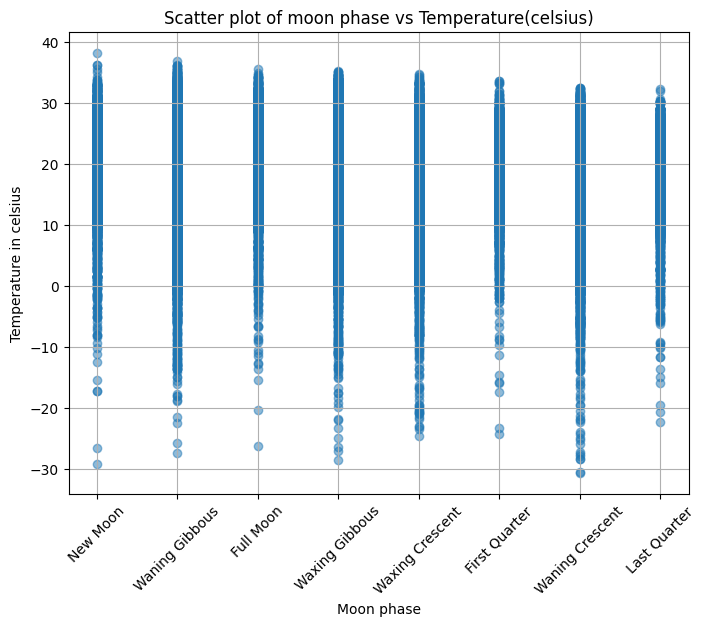

In [34]:
moon_phase = df['moon_phase']
celsius = df['temperature_celsius']

plt.figure(figsize=(8,6))
plt.scatter(moon_phase,celsius,alpha=0.5)
plt.title("Scatter plot of moon phase vs Temperature(celsius)")
plt.xlabel("Moon phase")
plt.ylabel("Temperature in celsius")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
